# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Deep Learning II</font>

# Recurrent Neural Networks

Redes Neurais Recorrentes ou RNNs são um tipo especial de rede neural projetada para problemas sequenciais. Considerando uma rede padrão Multilayer Perceptron, uma rede neural recorrente pode ser pensada como a adição de loops à arquitetura. Por exemplo, em uma dada camada, cada neurônio pode passar seu sinal para frente (feed-forward) e também para o lado. 

Uma Rede Neural Recorrente é basicamente uma rede neural que pode ser usada quando seus dados são tratados como uma sequência, onde a ordem particular dos pontos de dados é importante e esta sequência pode ser de comprimento arbitrário.

O exemplo mais claro é talvez uma série temporal de números, onde a tarefa é prever o próximo valor de acordo com valores anteriores. A entrada para a RNN em cada passo de tempo é o valor atual, bem como um vetor de estado que representa o que a rede "viu" no tempo - etapas anteriores. Este estado-vetor é a memória codificada da RNN, inicialmente definida como zero.

![RNN](images/rnn01.png "RNN")

## Sequências

Mas você pode estar se perguntando: o que torna a Recurrent Neural Network tão especial? Uma limitação flagrante das Redes Neurais clássicas (e também das Redes Convolucionais) é que seu modelo é muito restrito: eles aceitam um vetor de tamanho fixo como entrada (por exemplo, uma imagem) e produzem um vetor de tamanho fixo como saída (por exemplo, probabilidades de diferentes classes ). Não só isso: esses modelos executam esse mapeamento usando uma quantidade fixa de etapas computacionais (por exemplo, o número de camadas no modelo). A principal razão pela qual as redes recorrentes são mais eficientes é que elas nos permitem operar sobre sequências de vetores: sequências na entrada, na saída ou no caso mais geral em ambos. Alguns exemplos podem tornar isso mais concreto:

![RNN](images/diags.jpeg "RNN")

Existem alguns tipos de problemas que são melhor enquadrados envolvendo uma sequência como entrada ou
uma saída. Por exemplo, considere um problema de séries temporais univariadas, como o preço de ações ns bolsas de valores ao longo do tempo. Este conjunto de dados pode ser enquadrado como um problema de previsão para uma Rede Multilayer Perceptron clássica, definindo um tamanho de janela (por exemplo, 5) e treinando a rede para aprender a fazer previsões de curto prazo a partir da janela de entrada de tamanho x.

Isso funcionaria, mas é muito limitado. A janela de entradas adiciona memória ao problema, mas é limitado a apenas um número x de pontos e deve ser escolhido com um conhecimento adequado do problema. Um valor de janela inadequado não capturaria as tendências mais amplas em minutos, horas e dias que podem ser relevantes para fazer uma previsão. De uma previsão para a próxima, a rede só conhece as entradas especificadas que são fornecidas. 

Consideremos a seguinte taxonomia de problemas de sequência que requerem um mapeamento de uma entrada para um resultado:

* One-to-Many: saída de sequência, usada para gerar legendas para imagens em vídeos.
* Many-to-One: entrada de sequência, para classificação de sentimento.
* Many-to-Many: sequência de entrada e saída, para tradução automática.
* Synchronized Many-to-Many: sequências sincronizadas de entrada e saída, para classificar vídeo.

## Como Treinar Redes Neurais Recorrentes (BPTT ou BackPropagation Through Time)


A RNN consiste em um grupo de unidades de entrada rotuladas (representada pela letra u neste diagrama) e unidades de saída rotuladas (representadas pela letra y neste diagrama). Existem também as unidades ocultas que fazem a maior parte do trabalho interessante. Você pode notar que a ilustração mostra um fluxo unidirecional de informações das unidades de entrada para as unidades ocultas, bem como outro fluxo unidirecional de informações das unidades ocultas para as unidades de saída. Entretanto, existem conexões cíclicas nas camadas ocultas, que é exatamente a arquitetura de RNN’s. Em alguns casos, as RNNs quebram as restrições com conexões que conduzem das unidades de saída de volta para as unidades ocultas. Estes são chamados "backprojections", e fazem a análise de RNNs muito mais complexa. As mesmas técnicas que discutimos aqui também se aplicam a RNNs com backprojections. Existem muitas dificuldades técnicas envolvidas no treinamento redes neurais recorrentes, e ainda é uma área muito ativa em pesquisa. 

![RNN](images/rnn02.png "RNN")

Em um modelo Multiplayer Perceptron clássico, o erro da rede é retro-propagado e usado para atualizar os pesos da rede. Entretanto, essa mesma estratégia em uma rede neural recorrente provoca 2 possíveis consequências com o gradiente: tende ao infinito, quando o valor é muito grande, ou a degradação, quando o valor é muito pequeno, devido as conexões recorrentes. Ambos os casos são problemas, mas foram resolvidos (ou amenizados) com uma modificação na técnica de Backpropagation chamada BPTT ou BackPropagation Through Time.

Uma vez definida a arquitetura da RNN, é possível iniciar o treinamento por meio da minimização de uma função de custo J. Nesse caso, uma variante do algoritmo backpropagation é utilizada, a denominada retropropagação através do tempo (Backpropagation Through Time, BPTT). O BPTT pode ser entendido se considerarmos que uma RNN corresponde a uma rede alimentada adiante (ou feed forward) com uma camada para cada passo de tempo e na qual a matriz de pesos de cada camada é a mesma, se considerarmos o desdobramento da rede através do tempo. (Aliás, é dessa perspectiva que se originou o nome do algoritmo BPTT.) Dessa forma, após o fornecimento da sequência de entrada, os gradientes são calculados (da mesma maneira que nas redes feed-forward) e posteriormente alterados para manter a restrição de igualdade da matriz de pesos em cada camada oculta. 

![BPTT](images/BPTT.png "BPTT")

## Como Obter Gradientes Estáveis Durante o Treinamento da RNN

Quando Backpropagation é usado em redes neurais profundas e redes neurais recorrentes, os gradientes que são calculados para atualizar os pesos podem ser tornar instáveis. Os gradientes podem assumir valores muito grandes, levando ao que chamados de "explosão dos gradientes" ou valores muitos pequenos, levando ao que chamamos de "degradação dos gradientes" (Vanishing Gradient). Ambos os casos são ruins e tornam o treinamento instável e a rede com previsões não confiáveis.

Este problema é aliviado em redes neurais profundas através do uso da função de ativação ReLu e com o uso de técnicas mais exóticas e menos populares como o uso de Pré-treinamento não supervisionado de camadas. Nas arquiteturas redes neurais recorrentes, esse problema foi amenizado usando um novo tipo de arquitetura chamada Long Short-Term Memory Networks (LSTMs) que permite a formação de redes recorrentes profundas.

## LSTMs

A principal característica das RNNs para a classificação de sequências é a habilidade de usar informação contextual para realizar o mapeamento entre as entradas e as saídas. O problema é que a influência de uma entrada na camada intermediária e, consequentemente, na camada de saída, ou cresce exponencialmente ou é diluída enquanto circula pelas conexões recorrentes da rede. Conhecidos como problemas de explosão do gradiente e dissipação do gradiente (vanishing gradient problem), eles tornam difícil para RNNs aprender tarefas que contenham mais que dez atrasos no tempo (timesteps) entre a apresentação de entradas relevantes e eventos esperados. Neste diagrama é possível observar a dissipação do gradiente com o tempo. À medida que novas entradas são apresentadas à rede, a ativação da camada intermediária é sobrescrita e a rede ”esquece‟ as primeiras entradas. Dentre várias soluções propostas para reduzir os impactos da dissipação do gradiente em RNNs, a solução mais efetiva é a arquitetura Long Short-Term Memory (LSTM).

![RNN](images/rnn03.png "RNN")

As Long Short-Term Memory Networks (LSTMs) são redes neurais recorrentes treinadas usando a retro-propagação ao longo do tempo (BPTT) e ajudam a superar o problema da degradação do gradiente. Assim sendo, essa arquitetura pode ser usada para criar redes recorrentes grandes (empilhadas), que, por sua vez, podem ser usadas para endereçar problemas de sequência e obter resultados de ponta. 

Ao invés de neurônios, as redes LSTM possuem blocos de memória conectados em camadas. Um bloco tem componentes que o tornam mais inteligente do que um neurônio clássico e uma memória para sequências recentes. Um bloco contém "portões" que gerenciam o estado e a saída do bloco. Uma unidade opera em uma sequência de entrada e cada portão dentro de uma unidade usa a função de ativação sigmoid para controlar se eles são acionados ou não, fazendo a mudança de estado e adição de informação. Existem três tipos de portões dentro de uma unidade de memória:

* Forget Gate: condicionalmente decide que informação deve ser descartada da unidade.
* Input Gate: condicionalmente decide que valores do input que devem ter o estado de memória atualizado.
* Output Gate: condicionalmente decide o que gerar como output com base no input e na memória da unidade.

![LSTM](images/lstm.jpg "LSTM")

A arquitetura LSTM consiste de um conjunto de sub-redes conectadas recorrentemente. Essas sub-redes, chamadas de blocos de memória, podem ser consideradas uma metáfora de chips de memória. Cada bloco possui uma ou mais células de memória autoconectadas e três unidades de multiplicação que definem a operação que deve ser realizada, as portas de entrada, saída e de esquecimento. Voltando à analogia com chips de memória, essas operações podem ser interpretadas como as operações de escrita, leitura e de limpeza (reset) dos circuitos.

A única diferença estrutural de uma rede LSTM para uma RNN é que os elementos da camada intermediária deixam de ser neurônios com funções de ativação não lineares e passam a ser blocos de memória. O chaveamento das portas permite preservar a informação do bloco por muito tempo, evitando o problema da degradação do gradiente. Enquanto a porta de entrada estiver fechada, a ativação da célula de informação não será alterada, podendo ser acessada em um outro momento ativando a porta de saída. A informação é mantida na célula através de uma conexão recorrente de peso 1.

![RNN](images/rnn04.png "RNN")

A Rede LSTM preserva o gradiente da informação como ilustrado nesse diagrama. A sensibilidade do bloco de memória pode ser controlada pela porta de saída sem afetar a célula de informação do bloco. Por fim, a entrada só afeta a informação quando a porta de entrada está aberta.

Cada unidade é como uma mini-máquina de estado onde os portões das unidades têm pesos que são aprendidos durante o procedimento de treinamento. Isso permite uma aprendizagem sofisticada e memória em cada uma das camadas de LSTMs, e não é difícil imaginar abstrações de ordem superior quando utilizadas várias camadas.

## Prevendo Séries Temporais com Multilayer Perceptron

A previsão de séries temporais é um problema difícil para o aprendizado da máquina.

O problema que vamos analisar é a previsão dos passageiros das companhias aéreas internacionais. Este é um problema em que, dado um ano e um mês, a tarefa é prever o número de passageiros das linhas aéreas internacionais em unidades de 1.000. Os dados variam de janeiro de 1949 a dezembro 1960 ou 12 anos, com 144 observações. O conjunto de dados está disponível gratuitamente no DataMarket, aqui: https://datamarket.com/data/set/22u3/international-airline-passengers-monthly-totals-in-thousands-jan-49-dec-60#!ds=22u3&display=line, com o nome internacional-companhia aérea-passageiros.csv (você encontra o arquivo em anexo com o nome passageiros.csv). 

In [1]:
import tensorflow as tf
tf.__version__

'2.5.0'

In [2]:
import keras as k
k.__version__

'2.5.0'

In [3]:
# Imports
import math
import pandas
import numpy
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

# Imports para formatação dos gráficos
#plt.style.use('fivethirtyeight')
import matplotlib as m

m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'
from pylab import rcParams
rcParams['figure.figsize'] = 16, 8

In [4]:
# Random seed 
numpy.random.seed(7)

In [6]:
# Carregando os dados
# Podemos carregar este conjunto de dados facilmente usando a biblioteca Pandas. Não estamos interessados na data,
# pois que cada observação é separada pelo mesmo intervalo de um mês. Portanto, quando
# carregamos o conjunto de dados, podemos excluir a primeira coluna. O conjunto de dados baixado também tem rodapé
# com informações que podemos excluir com o argumento skipfooter para pandas.read_csv() 
# Uma vez carregado, podemos plotar facilmente todo o conjunto de dados. 



#dataframe = pandas.read_csv('passageiros.csv', usecols = [1], engine = 'python', skipfooter = 3)
#dataset = dataframe.values
#dataset = dataset.astype('float32')

In [7]:
# Carrega os dataframe
dataframe = pandas.read_csv("./CSV/pipaColBrokerDia.csv")
dataframe['DATA'] = pandas.to_datetime(dataframe.DATA, format = '%Y-%m-%dT%H:%M:%S.%fZ')
dataframe.rename(columns={'DATA': 'Data'}, inplace=True)
dataframe = dataframe[['Data','BROKER','SERVICE_NAME','SERVICE_CLASS','PROGRAMA', 'QUANTIDADE']]
dataframe.rename(columns={'BROKER': 'Broker', 'SERVICE_NAME': 'Service_name', 'SERVICE_CLASS': 'Service_class',
                      'PROGRAMA': 'Programa', 'QUANTIDADE': 'Quantidade'}, inplace=True)

# Carregando os dados
# Podemos carregar este conjunto de dados facilmente usando a biblioteca Pandas. Não estamos interessados na data,
# pois que cada observação é separada pelo mesmo intervalo de um mês. Portanto, quando
# carregamos o conjunto de dados, podemos excluir a primeira coluna. O conjunto de dados baixado também tem rodapé
# com informações que podemos excluir com o argumento skipfooter para pandas.read_csv() 
# Uma vez carregado, podemos plotar facilmente todo o conjunto de dados. 

filtro1 = dataframe['Broker']=='ETB170'
filtro2 = dataframe['Service_name']=='PORTALDETRAN'
filtro3 = dataframe['Programa']=='NSDGX500'
dataframe = dataframe[filtro1 & filtro2 & filtro3]

dataframe = dataframe.rename_axis('index').reset_index()
dataframe.drop(columns=['index','Broker','Service_name','Service_class','Programa'], inplace=True)

# Remove as linhas com as datas duplicadas
# Vamos transformar a coluna de data no índice do conjunto de dados. Isso vai facilitar nosso trabalho mais a frente.
# inclui dados missing com a interpolação 

dataframe.drop_duplicates(subset='Data', inplace=True)
dataframe = dataframe.set_index('Data')
dataframe = dataframe.resample('D').interpolate()


In [11]:
dataset=dataframe.copy()
dataset = dataframe.values
dataset = dataset.astype('float32')

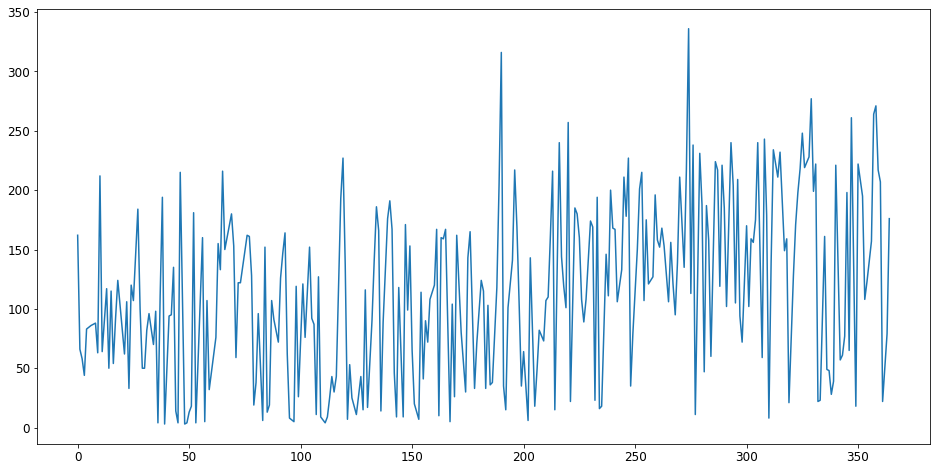

In [12]:
plt.plot(dataset)
plt.show()

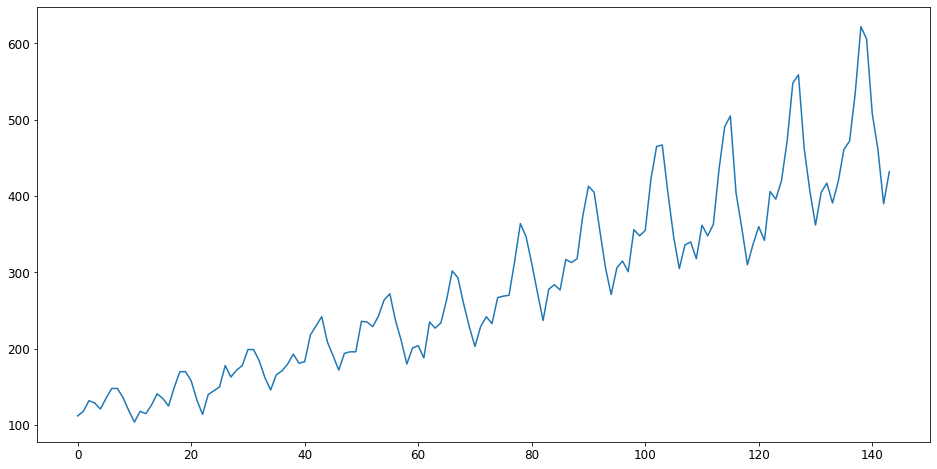

In [9]:
plt.plot(dataset)
plt.show()

In [13]:
# Split em treino e teste
# Separa os dados em 67% das observações que podemos usar para treinamento do nosso modelo, deixando os 33% 
# restantes para testar o modelo.
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

273 92


In [11]:
train

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [30

In [14]:
# Agora podemos definir uma função para criar um novo conjunto de dados como descrito acima. A função
# recebe 2 argumentos: o conjunto de dados, que é um array NumPy que queremos converter em um dataset e
# look back que é o número de etapas de tempo anteriores para usar como variáveis de entrada para prever
# O próximo período de tempo, neste caso, definido como 1. Esse padrão criará um conjunto de dados onde X é
# o número de passageiros em um determinado momento (t) e Y é o número de passageiros no próximo
# momento (t + 1). 
def create_dataset(dataset, look_back = 1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [15]:
# Reshape em X = t e Y = t + 1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Imprimindo dataset de treino
print('dataset de treino primeira linha:', '\n', trainX[0:1], trainY[0:1])

print('dataset de treino segunda linha:', '\n', trainX[1:2], trainY[1:2])

print('dataset de treino terceira linha:', '\n', trainX[1:2], trainY[1:2])

# Imprimindo dataset original
print("\n", 'dataset original: ', '\n', dataset[0:2])

dataset de treino primeira linha: 
 [[162.]] [66.]
dataset de treino segunda linha: 
 [[66.]] [58.]
dataset de treino terceira linha: 
 [[66.]] [58.]

 dataset original:  
 [[162.]
 [ 66.]]


In [16]:
# Cria o modelo MLP com 1 input, 1 camada oculta com 8 neurônios e uma camada de saída
model = Sequential()

# Camada oculta
model.add(Dense(8, input_dim = look_back, activation = 'relu'))

# Camada de saída
model.add(Dense(1))

# Compilação
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

# Fit do modelo
model.fit(trainX, trainY, epochs = 200, batch_size = 2, verbose = 2)

Epoch 1/200
136/136 - 21s - loss: 18434.4746
Epoch 2/200
136/136 - 0s - loss: 12573.0020
Epoch 3/200
136/136 - 0s - loss: 8816.8037
Epoch 4/200
136/136 - 0s - loss: 6517.5874
Epoch 5/200
136/136 - 0s - loss: 5338.3154
Epoch 6/200
136/136 - 0s - loss: 4912.2236
Epoch 7/200
136/136 - 0s - loss: 4782.4160
Epoch 8/200
136/136 - 0s - loss: 4749.8789
Epoch 9/200
136/136 - 0s - loss: 4738.5229
Epoch 10/200
136/136 - 0s - loss: 4721.9473
Epoch 11/200
136/136 - 0s - loss: 4718.0288
Epoch 12/200
136/136 - 0s - loss: 4709.5430
Epoch 13/200
136/136 - 0s - loss: 4718.0532
Epoch 14/200
136/136 - 0s - loss: 4712.0522
Epoch 15/200
136/136 - 0s - loss: 4707.1841
Epoch 16/200
136/136 - 0s - loss: 4709.3257
Epoch 17/200
136/136 - 0s - loss: 4694.8984
Epoch 18/200
136/136 - 0s - loss: 4692.2842
Epoch 19/200
136/136 - 0s - loss: 4696.2690
Epoch 20/200
136/136 - 0s - loss: 4683.4087
Epoch 21/200
136/136 - 0s - loss: 4674.4287
Epoch 22/200
136/136 - 0s - loss: 4674.1592
Epoch 23/200
136/136 - 0s - loss: 4673

Epoch 186/200
136/136 - 0s - loss: 4029.6240
Epoch 187/200
136/136 - 0s - loss: 4030.8018
Epoch 188/200
136/136 - 0s - loss: 4020.3196
Epoch 189/200
136/136 - 0s - loss: 4019.3438
Epoch 190/200
136/136 - 0s - loss: 4011.3523
Epoch 191/200
136/136 - 0s - loss: 4013.4963
Epoch 192/200
136/136 - 0s - loss: 4010.0171
Epoch 193/200
136/136 - 0s - loss: 4003.7930
Epoch 194/200
136/136 - 0s - loss: 3996.8606
Epoch 195/200
136/136 - 0s - loss: 3993.6489
Epoch 196/200
136/136 - 0s - loss: 3990.8865
Epoch 197/200
136/136 - 0s - loss: 3990.8481
Epoch 198/200
136/136 - 0s - loss: 3998.5146
Epoch 199/200
136/136 - 0s - loss: 3979.5669
Epoch 200/200
136/136 - 0s - loss: 3976.7874


In [17]:
# Estima a performance do modelo
# Tomando a raiz quadrada das estimativas de desempenho, podemos ver que o modelo tem um
# erro médio de 23 passageiros (em milhares) no conjunto de dados de treinamento e 48 passageiros (em
# milhares) no conjunto de dados de teste.

trainScore = model.evaluate(trainX, trainY, verbose = 0)
print('Score em Treino: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose = 0)
print('Score em Teste: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Score em Treino: 3961.98 MSE (62.94 RMSE)
Score em Teste: 7081.74 MSE (84.15 RMSE)


In [18]:
# Gera previsões
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [19]:
trainPredict[0:1]

array([[127.43313]], dtype=float32)

In [20]:
testPredict[0:1]

array([[161.75862]], dtype=float32)

In [21]:
numpy.empty_like(dataset)

array([[ 0.0000000e+00],
       [ 0.0000000e+00],
       [ 0.0000000e+00],
       [ 0.0000000e+00],
       [ 0.0000000e+00],
       [ 0.0000000e+00],
       [ 2.2983504e-10],
       [ 4.5913544e-41],
       [ 2.4662853e-43],
       [ 0.0000000e+00],
       [-9.0486556e-04],
       [ 7.3428040e-43],
       [-1.0937565e+10],
       [ 7.3428040e-43],
       [-9.4367564e-04],
       [ 7.3428040e-43],
       [-3.3377856e-04],
       [ 7.3428040e-43],
       [-3.3367611e-04],
       [ 7.3428040e-43],
       [-3.4114718e-04],
       [ 7.3428040e-43],
       [-3.4113601e-04],
       [ 7.3428040e-43],
       [-3.3378042e-04],
       [ 7.3428040e-43],
       [-3.4111738e-04],
       [ 7.3428040e-43],
       [-9.4024464e-04],
       [ 7.3428040e-43],
       [-3.4117326e-04],
       [ 7.3428040e-43],
       [-2.3030490e-04],
       [ 7.3428040e-43],
       [-7.2298944e-04],
       [ 7.3428040e-43],
       [-2.0439737e-04],
       [ 7.3428040e-43],
       [-2.3026206e-04],
       [ 7.3428040e-43],


In [22]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot

array([[ 1.40129846e-45],
       [ 0.00000000e+00],
       [ 2.29869679e-10],
       [ 4.59135442e-41],
       [ 1.92678539e-42],
       [ 0.00000000e+00],
       [            nan],
       [            nan],
       [ 3.19496050e-43],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 1.35631564e-19],
       [ 4.50713181e+16],
       [ 6.33692210e-10],
       [ 6.40969056e-10],
       [ 8.14240168e-13],
       [ 3.14327384e-12],
       [ 1.35631280e-19],
       [ 1.35631564e-19],
       [ 4.00465043e-11],
       [ 6.40969056e-10],
       [ 5.20015877e+22],
       [ 7.93480914e+17],
       [ 1.35558927e-19],
       [ 1.35631564e-19],
       [ 5.83371573e-10],
       [ 6.40968945e-10],
       [ 6.40969056e-10],
       [ 6.40900943e-10],
       [ 1.17037333e-19],
       [ 1.35631564e-19],
       [ 1.85606508e-19],
       [ 6.40940634e-10],
       [ 6.40969056e-10],
       [ 6.23532337e-10],
       [ 8.29902538e-33],
       [ 1.35631564e-19],
       [ 4.5

In [23]:
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[:, :] 

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
      

In [24]:
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
trainPredictPlot

array([[       nan],
       [127.43313 ],
       [ 67.51953 ],
       [ 62.526733],
       [ 53.789337],
       [ 78.12923 ],
       [ 79.065384],
       [ 80.001526],
       [ 80.62564 ],
       [ 81.24973 ],
       [ 65.64723 ],
       [158.6381  ],
       [ 66.27133 ],
       [ 82.80998 ],
       [ 99.34863 ],
       [ 57.533936],
       [ 98.100426],
       [ 60.030334],
       [ 83.74613 ],
       [103.71733 ],
       [ 90.81926 ],
       [ 77.921196],
       [ 65.02313 ],
       [ 92.48353 ],
       [ 46.924236],
       [101.22093 ],
       [ 93.10763 ],
       [117.135475],
       [141.16331 ],
       [ 88.73893 ],
       [ 57.533936],
       [ 57.533936],
       [ 77.50513 ],
       [ 86.24253 ],
       [ 78.12923 ],
       [ 70.01593 ],
       [ 87.49073 ],
       [ 28.82534 ],
       [ 95.60403 ],
       [147.40431 ],
       [ 28.20124 ],
       [ 56.597786],
       [ 84.99432 ],
       [ 85.61843 ],
       [110.58243 ],
       [ 35.066338],
       [ 28.82534 ],
       [160.5

In [25]:
look_back

1

In [26]:
len(trainPredict)+look_back

272

In [27]:
trainPredictPlot[look_back:len(trainPredict)+look_back]

array([[127.43313 ],
       [ 67.51953 ],
       [ 62.526733],
       [ 53.789337],
       [ 78.12923 ],
       [ 79.065384],
       [ 80.001526],
       [ 80.62564 ],
       [ 81.24973 ],
       [ 65.64723 ],
       [158.6381  ],
       [ 66.27133 ],
       [ 82.80998 ],
       [ 99.34863 ],
       [ 57.533936],
       [ 98.100426],
       [ 60.030334],
       [ 83.74613 ],
       [103.71733 ],
       [ 90.81926 ],
       [ 77.921196],
       [ 65.02313 ],
       [ 92.48353 ],
       [ 46.924236],
       [101.22093 ],
       [ 93.10763 ],
       [117.135475],
       [141.16331 ],
       [ 88.73893 ],
       [ 57.533936],
       [ 57.533936],
       [ 77.50513 ],
       [ 86.24253 ],
       [ 78.12923 ],
       [ 70.01593 ],
       [ 87.49073 ],
       [ 28.82534 ],
       [ 95.60403 ],
       [147.40431 ],
       [ 28.20124 ],
       [ 56.597786],
       [ 84.99432 ],
       [ 85.61843 ],
       [110.58243 ],
       [ 35.066338],
       [ 28.82534 ],
       [160.5104  ],
       [ 94.3

In [28]:
trainPredictPlot[look_back:len(trainPredict)+look_back, :]

array([[127.43313 ],
       [ 67.51953 ],
       [ 62.526733],
       [ 53.789337],
       [ 78.12923 ],
       [ 79.065384],
       [ 80.001526],
       [ 80.62564 ],
       [ 81.24973 ],
       [ 65.64723 ],
       [158.6381  ],
       [ 66.27133 ],
       [ 82.80998 ],
       [ 99.34863 ],
       [ 57.533936],
       [ 98.100426],
       [ 60.030334],
       [ 83.74613 ],
       [103.71733 ],
       [ 90.81926 ],
       [ 77.921196],
       [ 65.02313 ],
       [ 92.48353 ],
       [ 46.924236],
       [101.22093 ],
       [ 93.10763 ],
       [117.135475],
       [141.16331 ],
       [ 88.73893 ],
       [ 57.533936],
       [ 57.533936],
       [ 77.50513 ],
       [ 86.24253 ],
       [ 78.12923 ],
       [ 70.01593 ],
       [ 87.49073 ],
       [ 28.82534 ],
       [ 95.60403 ],
       [147.40431 ],
       [ 28.20124 ],
       [ 56.597786],
       [ 84.99432 ],
       [ 85.61843 ],
       [110.58243 ],
       [ 35.066338],
       [ 28.82534 ],
       [160.5104  ],
       [ 94.3

In [29]:
# Ajusta os dados de teste para o Plot
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot

array([[1.40129846e-45],
       [0.00000000e+00],
       [2.29869679e-10],
       [4.59135442e-41],
       [2.00105421e-42],
       [0.00000000e+00],
       [           nan],
       [           nan],
       [3.19496050e-43],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.35631564e-19],
       [4.50713181e+16],
       [4.16539615e-11],
       [2.60770339e-09],
       [3.14238631e-12],
       [1.35631280e-19],
       [1.35631564e-19],
       [1.08555787e-05],
       [1.68998464e-04],
       [7.21476784e+17],
       [1.35558927e-19],
       [1.35631564e-19],
       [2.38948996e-06],
       [1.05460902e-08],
       [4.17268993e-08],
       [1.17037333e-19],
       [1.35631564e-19],
       [1.85606508e-19],
       [1.03831308e-05],
       [4.17287254e-08],
       [8.29903052e-33],
       [1.35631564e-19],
       [4.50713181e+16],
       [4.18857171e-11],
       [1.07798295e-08],
       [3.14238631e-12],
       [1.35631280e-19],
       [1.35631564e-19],


In [30]:
# Ajusta os dados de teste para o Plot
testPredictPlot[:, :] = numpy.nan
testPredictPlot

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
      

In [31]:
testPredictPlot[:, :]

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
      

In [32]:
# Ajusta os dados de teste para o Plot
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
testPredictPlot

array([[       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [     

In [33]:
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :]

array([[161.75862 ],
       [236.0265  ],
       [ 96.852234],
       [174.8647  ],
       [ 33.19404 ],
       [101.84503 ],
       [170.49602 ],
       [143.65973 ],
       [ 55.661633],
       [143.03563 ],
       [124.93672 ],
       [ 63.774937],
       [114.951126],
       [166.12732 ],
       [161.75862 ],
       [100.596825],
       [164.255   ],
       [141.78741 ],
       [ 89.98712 ],
       [133.05002 ],
       [176.11292 ],
       [153.64531 ],
       [ 91.85942 ],
       [156.76582 ],
       [ 84.99432 ],
       [ 71.26413 ],
       [101.84503 ],
       [132.42593 ],
       [ 89.98712 ],
       [125.56083 ],
       [123.68852 ],
       [135.54642 ],
       [176.11292 ],
       [119.63188 ],
       [ 63.150833],
       [177.98521 ],
       [138.04282 ],
       [ 31.32174 ],
       [113.07882 ],
       [172.36832 ],
       [165.19116 ],
       [158.01402 ],
       [171.12012 ],
       [145.21997 ],
       [119.319824],
       [125.56083 ],
       [ 39.435036],
       [ 72.8

In [34]:
# Ajusta os dados de treino para o Plot
trainPredictPlot = numpy.empty_like(dataset)  #cria um array com o mesmo tamanho do dataset
trainPredictPlot[:, :] = numpy.nan            # preenche com nulo   
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict  #preenche com o treino e tira o nulo do início e fim

In [35]:
# Ajusta os dados de teste para o Plot
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

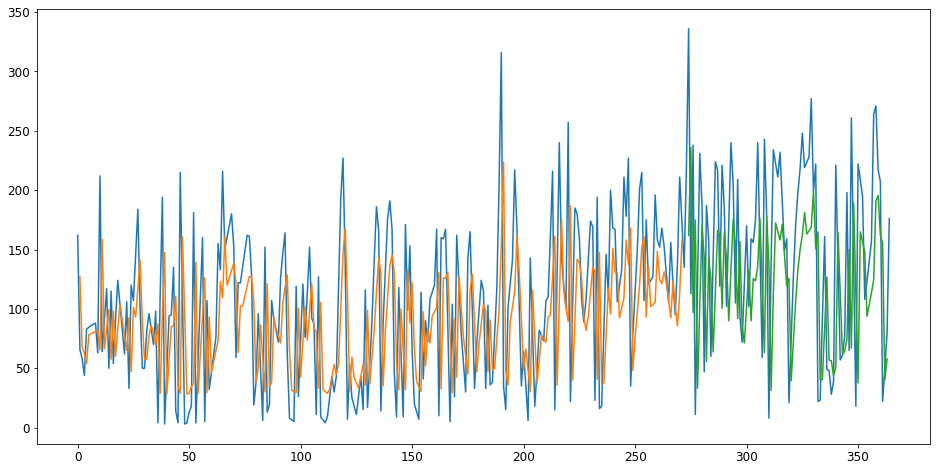

In [36]:
# Plot do baseline e previsões
# Podemos ver que o modelo fez um trabalho bastante ruim tanto no treinamento quanto no teste.
# Ele basicamente previu a saída exatamente como o mesmo valor de entrada.
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## Prevendo Séries Temporais com Multilayer Perceptron e Usando Método Window

Podemos também tentar resolver o problema de modo que várias etapas de tempo recente possam ser usadas para a previsão do próximo passo. Isso é chamado de método de janela (Window) e o tamanho da janela é um parâmetro que pode ser sintonizado para cada problema. Por exemplo, dado o tempo atual (t) nós queremos prever o valor na próxima vez na sequência (t + 1), podemos usar o tempo atual (T) bem como os dois tempos anteriores (t-1 e t-2). Quando formulado como um problema de regressão, as variáveis de entrada são t-2, t-1, t e a variável de saída é t + 1.

In [61]:
# Carregando o dataset
dataset=dataframe.copy()
dataset = dataframe.values
dataset = dataset.astype('float32')

In [62]:
# Split em treino e teste
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

273 92


In [63]:
# Reshape - Perceba o valor da variável look_back
look_back = 30

In [52]:
# Reshape - Perceba o valor da variável look_back
#look_back = 10

In [64]:
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [65]:
# Imprimindo dataset de treino e dataset original
print("\n")
print("Dataset de treino: ", trainX[0:1], trainY[0:1])
print("\nDataset original: ", dataset[0:2])
print("\n")



Dataset de treino:  [[162.        66.        58.        44.        83.        84.5
   86.        87.        88.        63.       212.        64.
   90.5      117.        50.       115.        54.        92.
  124.       103.333336  82.666664  62.       106.        33.
  120.       107.       145.5      184.       100.        50.      ]] [50.]

Dataset original:  [[162.]
 [ 66.]]




In [54]:
# Imprimindo dataset de treino e dataset original
print("\n")
print("Dataset de treino: ", trainX[0:1], trainY[0:1])
print("\nDataset original: ", dataset[0:2])
print("\n")



Dataset de treino:  [[162.   66.   58.   44.   83.   84.5  86.   87.   88.   63. ]] [212.]

Dataset original:  [[162.]
 [ 66.]]




In [66]:
# Modelo MLP
model = Sequential()
model.add(Dense(8, input_dim = look_back, activation = 'relu'))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
121/121 - 1s - loss: 22858.2441
Epoch 2/200
121/121 - 0s - loss: 7590.3193
Epoch 3/200
121/121 - 0s - loss: 6716.4463
Epoch 4/200
121/121 - 0s - loss: 6120.2788
Epoch 5/200
121/121 - 0s - loss: 5603.5405
Epoch 6/200
121/121 - 0s - loss: 5194.9697
Epoch 7/200
121/121 - 0s - loss: 4803.7017
Epoch 8/200
121/121 - 0s - loss: 4534.7339
Epoch 9/200
121/121 - 0s - loss: 4366.5981
Epoch 10/200
121/121 - 0s - loss: 4203.7358
Epoch 11/200
121/121 - 0s - loss: 4066.8838
Epoch 12/200
121/121 - 0s - loss: 4012.3506
Epoch 13/200
121/121 - 0s - loss: 3858.9585
Epoch 14/200
121/121 - 0s - loss: 3729.2837
Epoch 15/200
121/121 - 0s - loss: 3695.5261
Epoch 16/200
121/121 - 0s - loss: 3601.1965
Epoch 17/200
121/121 - 0s - loss: 3528.2712
Epoch 18/200
121/121 - 0s - loss: 3506.9854
Epoch 19/200
121/121 - 0s - loss: 3439.5945
Epoch 20/200
121/121 - 0s - loss: 3403.6411
Epoch 21/200
121/121 - 0s - loss: 3331.4255
Epoch 22/200
121/121 - 0s - loss: 3336.0435
Epoch 23/200
121/121 - 0s - loss: 3290.9

Epoch 186/200
121/121 - 0s - loss: 1957.3788
Epoch 187/200
121/121 - 0s - loss: 1976.9124
Epoch 188/200
121/121 - 0s - loss: 1966.3295
Epoch 189/200
121/121 - 0s - loss: 2013.5815
Epoch 190/200
121/121 - 0s - loss: 1944.5950
Epoch 191/200
121/121 - 0s - loss: 1948.1432
Epoch 192/200
121/121 - 0s - loss: 1954.3340
Epoch 193/200
121/121 - 0s - loss: 1980.9661
Epoch 194/200
121/121 - 0s - loss: 1978.4183
Epoch 195/200
121/121 - 0s - loss: 1901.8514
Epoch 196/200
121/121 - 0s - loss: 1942.3447
Epoch 197/200
121/121 - 0s - loss: 1942.4368
Epoch 198/200
121/121 - 0s - loss: 1949.3051
Epoch 199/200
121/121 - 0s - loss: 1950.3632
Epoch 200/200
121/121 - 0s - loss: 1927.3075


In [67]:
# Performance do Modelo look_back = 30
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Score em Treino: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Score em Teste: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Score em Treino: 1865.40 MSE (43.19 RMSE)
Score em Teste: 10595.21 MSE (102.93 RMSE)


In [56]:
# Performance do Modelo look_back = 10
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Score em Treino: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Score em Teste: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Score em Treino: 3037.97 MSE (55.12 RMSE)
Score em Teste: 5871.22 MSE (76.62 RMSE)


In [68]:
# Previsões para treino e teste
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [69]:
# Ajustando as previsões de treino para o Plot
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [70]:
# Ajustando as previsões de teste para o Plot
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

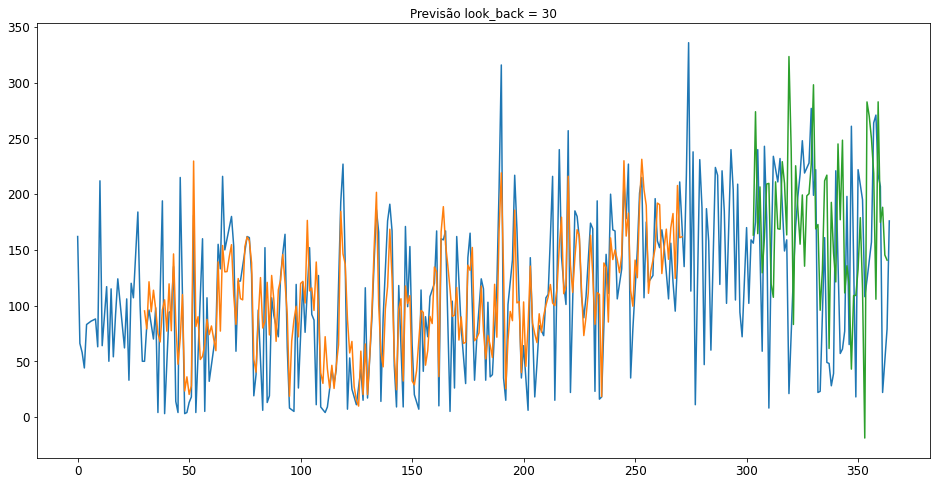

In [73]:
# Plot do baseline e previsões
# Podemos ver que o erro foi reduzido em comparação com o da seção anterior. 
# O tamanho da janela e a arquitetura da rede não foram sintonizados, isso é apenas uma demonstração de como
# enquadrar um problema de previsão em séries temporais. 
# Tomando a raiz quadrada dos escores de desempenho, podemos ver o erro médio no conjunto de dados de treinamento 
# foi de 14 passageiros (em milhares por mês) e o erro médio no conjunto de teste não visto foi de 23 passageiros 
# (em milhares por mês).

# Previsão look_back = 30

plt.title('Previsão look_back = 30')
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

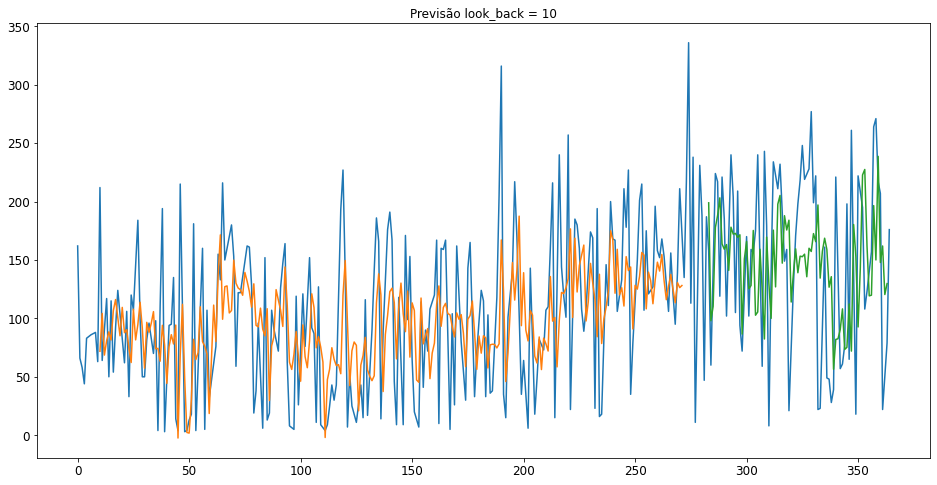

In [60]:
# Plot do baseline e previsões
# Podemos ver que o erro foi reduzido em comparação com o da seção anterior. 
# O tamanho da janela e a arquitetura da rede não foram sintonizados, isso é apenas uma demonstração de como
# enquadrar um problema de previsão em séries temporais. 
# Tomando a raiz quadrada dos escores de desempenho, podemos ver o erro médio no conjunto de dados de treinamento 
# foi de 14 passageiros (em milhares por mês) e o erro médio no conjunto de teste não visto foi de 23 passageiros 
# (em milhares por mês).

# Previsão look_back = 10

plt.title('Previsão look_back = 10')
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Fim